In [287]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


In [288]:
pd.set_option('display.max_columns' , None)

In [289]:
#hotelbookingdemand
df=pd.read_csv("hotel_bookings.csv")

In [290]:
len(df)

119390

In [291]:
df.shape

(119390, 32)

In [292]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [294]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [295]:
df.tail(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119380,City Hotel,0,44,2017,August,35,31,1,3,2,0.0,0,SC,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,140.75,0,1,Check-Out,2017-09-04
119381,City Hotel,0,188,2017,August,35,31,2,3,2,0.0,0,BB,DEU,Direct,Direct,0,0,0,A,A,0,No Deposit,14.0,NaN,0,Transient,99.00,0,0,Check-Out,2017-09-05
119382,City Hotel,0,135,2017,August,35,30,2,4,3,0.0,0,BB,JPN,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,7.0,NaN,0,Transient,209.00,0,0,Check-Out,2017-09-05
119383,City Hotel,0,164,2017,August,35,31,2,4,2,0.0,0,BB,DEU,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,42.0,NaN,0,Transient,87.60,0,0,Check-Out,2017-09-06
119384,City Hotel,0,21,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,2,Check-Out,2017-09-06
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [296]:
df['code'] = pd.factorize(df.arrival_date_month)[0]

In [297]:
df.arrival_date_month.value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [298]:
df.code.value_counts()

1     13877
0     12661
10    11791
3     11160
9     11089
11    10939
2     10508
8      9794
7      8068
4      6794
5      6780
6      5929
Name: code, dtype: int64

In [299]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,code
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,0


In [300]:
from sklearn.preprocessing import LabelEncoder

In [301]:
le=LabelEncoder()

In [302]:
df['code_le']= le.fit_transform(df.arrival_date_month)

In [303]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,code,code_le
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,5
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,5
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,0,5
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,0,5
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,0,5


In [304]:
#check for any duplicate values
df.duplicated() .sum()

31994

In [305]:
duplicate = df[df.duplicated()]
duplicate

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,code,code_le
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,0,5
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07,0,5
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07,0,5
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01,0,5
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03,1,1
119352,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03,1,1
119353,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03,1,1
119354,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03,1,1


In [306]:
df_New=pd.DataFrame.drop_duplicates(df)

In [307]:
df_New.duplicated().sum()

0

In [308]:
#check for null values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [309]:
df.drop('agent', axis=1, inplace=True)
df.drop('company', axis=1, inplace=True)

Number of bookings made in both the hotels.

In [310]:
print(df.hotel.value_counts())

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64


We have data only for 2 hotels namely Resort Hotel and City Hotel. Also, City Hotel has almost twice the number of bookings made in comparision to Resort Hotel

In [311]:
df= df.fillna(0)

In which month Hotel Booking is in demand for Resort Hotel and City Hotel

<AxesSubplot:xlabel='hotel', ylabel='count'>

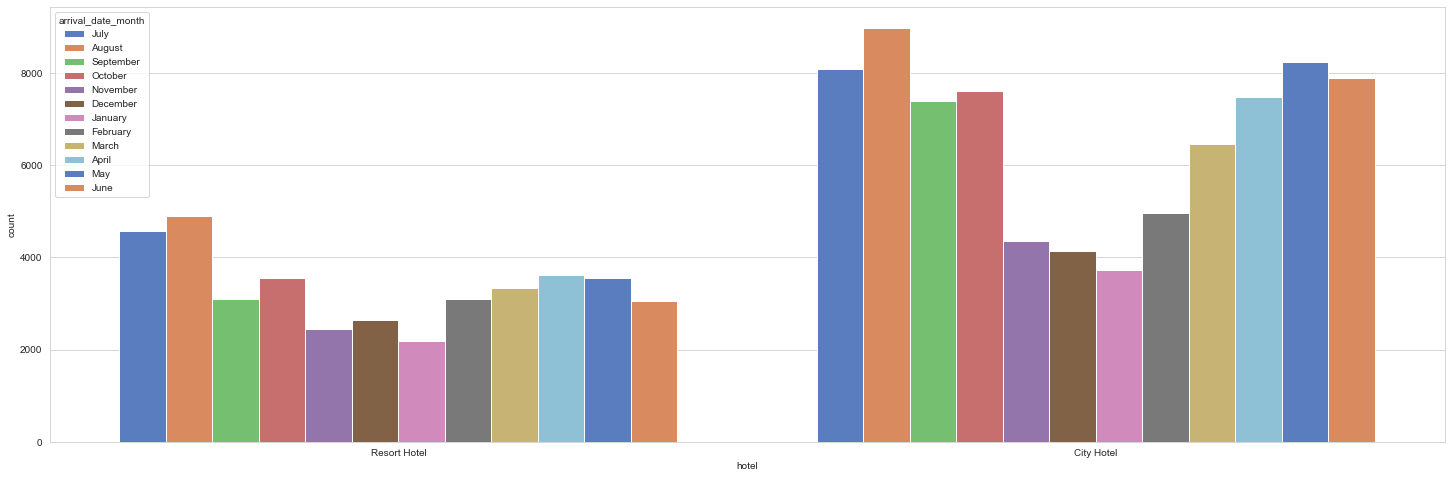

In [312]:
f,ax=plt.subplots(1,1,figsize=(25,8))
sns.countplot(x="hotel",hue="arrival_date_month",data=df,palette="muted")

In which hotel booking canclation is more?

<AxesSubplot:xlabel='hotel', ylabel='count'>

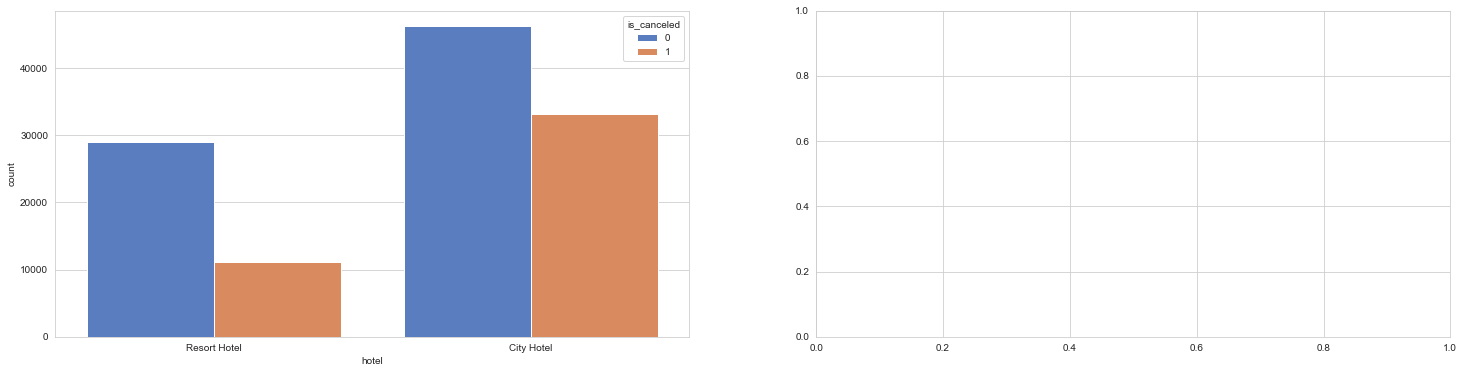

In [313]:
f,ax=plt.subplots(1,2,figsize=(25,6))

sns.countplot(x="hotel",hue="is_canceled",data=df,ax=ax[0], palette="muted")

Reservation Status in Hotel

<AxesSubplot:xlabel='hotel', ylabel='count'>

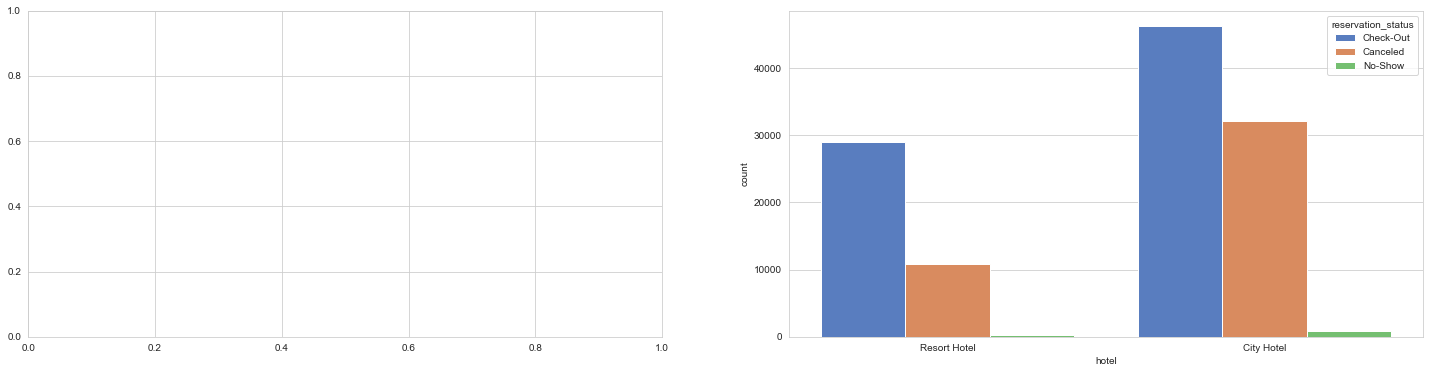

In [314]:
f,ax=plt.subplots(1,2,figsize=(25,6))
sns.countplot(x="hotel",hue="reservation_status",data=df,ax=ax[1], palette="muted")

Comparison of Resort Hotel and City Hotel

<AxesSubplot:xlabel='hotel', ylabel='count'>

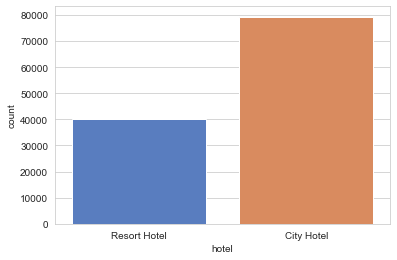

In [315]:
sns.countplot(x="hotel",data=df, palette="muted")

Percentage of adults,childrens,babies

<AxesSubplot:xlabel='hotel', ylabel='count'>

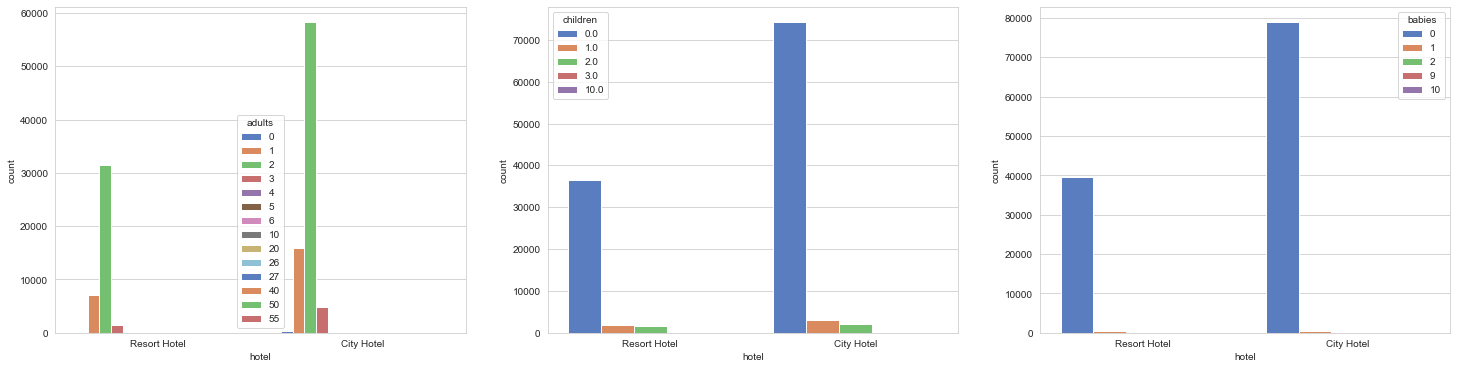

In [316]:
f,ax=plt.subplots(1,3,figsize=(25,6))
sns.countplot(x="hotel",hue="adults",data=df,ax=ax[0], palette="muted")
sns.countplot(x="hotel",hue="children",data=df,ax=ax[1], palette="muted")
sns.countplot(x="hotel",hue="babies",data=df,ax=ax[2], palette="muted")

Meals in Resort Hotel and City Hotel

<AxesSubplot:xlabel='hotel', ylabel='count'>

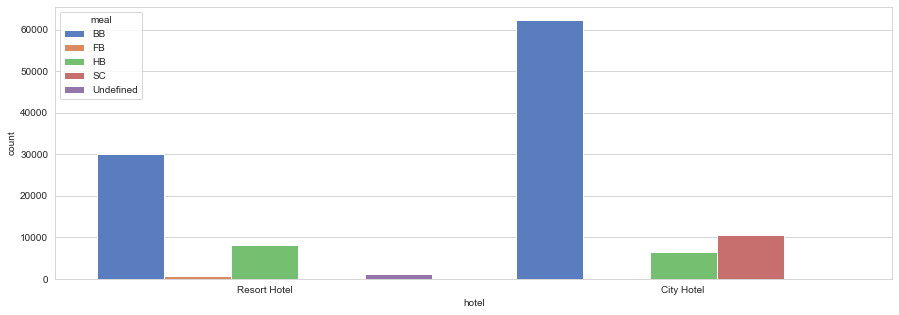

In [317]:
f,ax=plt.subplots(1,1,figsize=(15,5))
sns.countplot(x="hotel",hue="meal",data=df, palette="muted")

<AxesSubplot:xlabel='reservation_status', ylabel='count'>

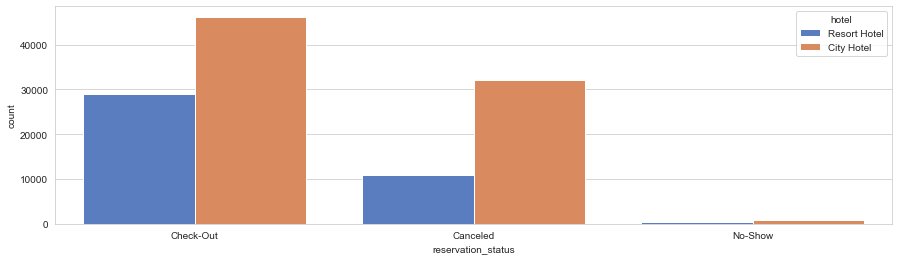

In [318]:
f,ax=plt.subplots(1,1,figsize=(15,4))
sns.countplot(x="reservation_status",hue="hotel",data=df, palette="muted")

<AxesSubplot:xlabel='deposit_type', ylabel='count'>

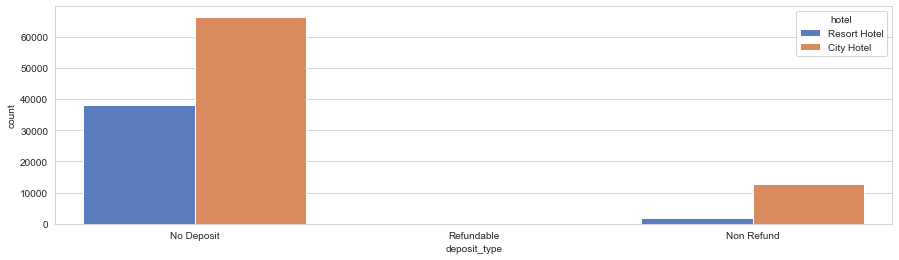

In [319]:
f,ax=plt.subplots(1,1,figsize=(15,4))
sns.countplot(x="deposit_type",hue="hotel",data=df, palette="muted")

<AxesSubplot:xlabel='customer_type', ylabel='count'>

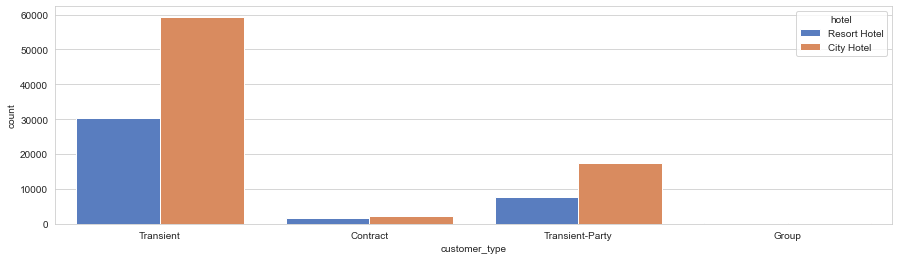

In [320]:
f,ax=plt.subplots(1,1,figsize=(15,4))
sns.countplot(x="customer_type",hue="hotel",data=df, palette="muted")

<AxesSubplot:xlabel='market_segment', ylabel='count'>

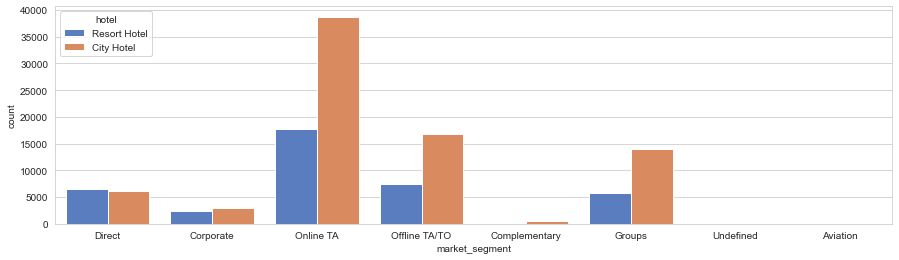

In [321]:
f,ax=plt.subplots(1,1,figsize=(15,4))
sns.countplot(x="market_segment",hue="hotel",data=df, palette="muted")


Which countries tourists visiting hotel


<AxesSubplot:xlabel='country', ylabel='count'>

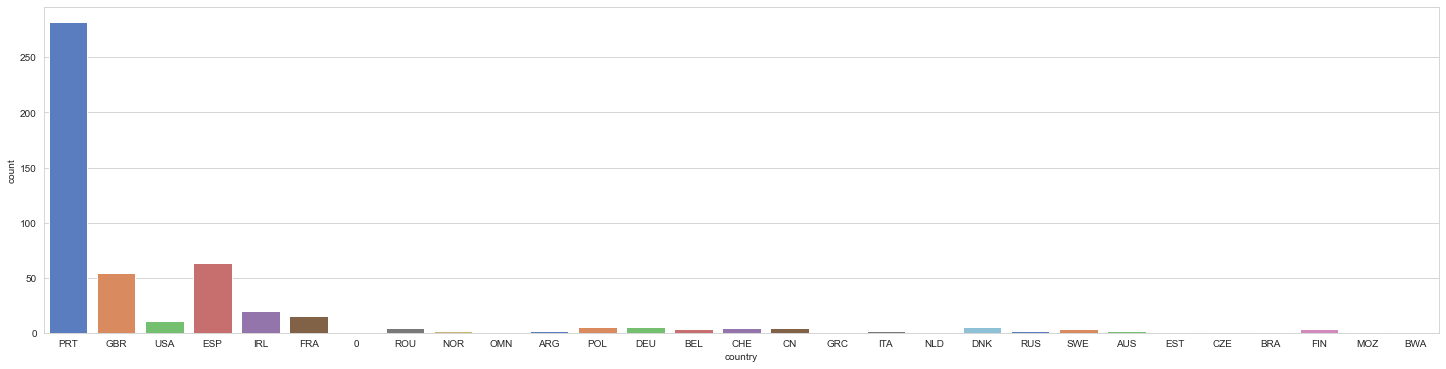

In [322]:
f,ax=plt.subplots(1,1,figsize=(25,6))
sns.countplot(x="country",data=df.head(500), palette="muted")

In which months more tourists visits more

<AxesSubplot:xlabel='arrival_date_month', ylabel='count'>

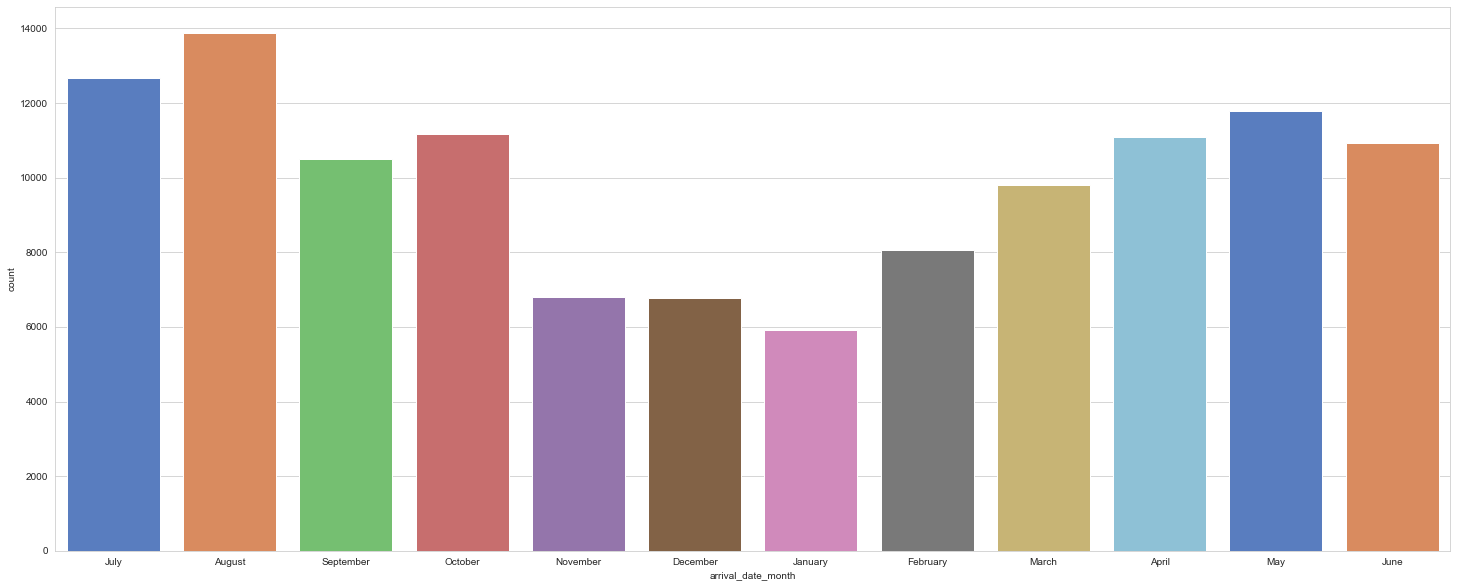

In [323]:
f,ax=plt.subplots(1,1,figsize=(25,10))
sns.countplot(x="arrival_date_month",data=df, palette="muted")

1.Determining Customer type

2.Reserved Room type

3.Assigned Room type

4.Distribution type



<AxesSubplot:xlabel='distribution_channel', ylabel='count'>

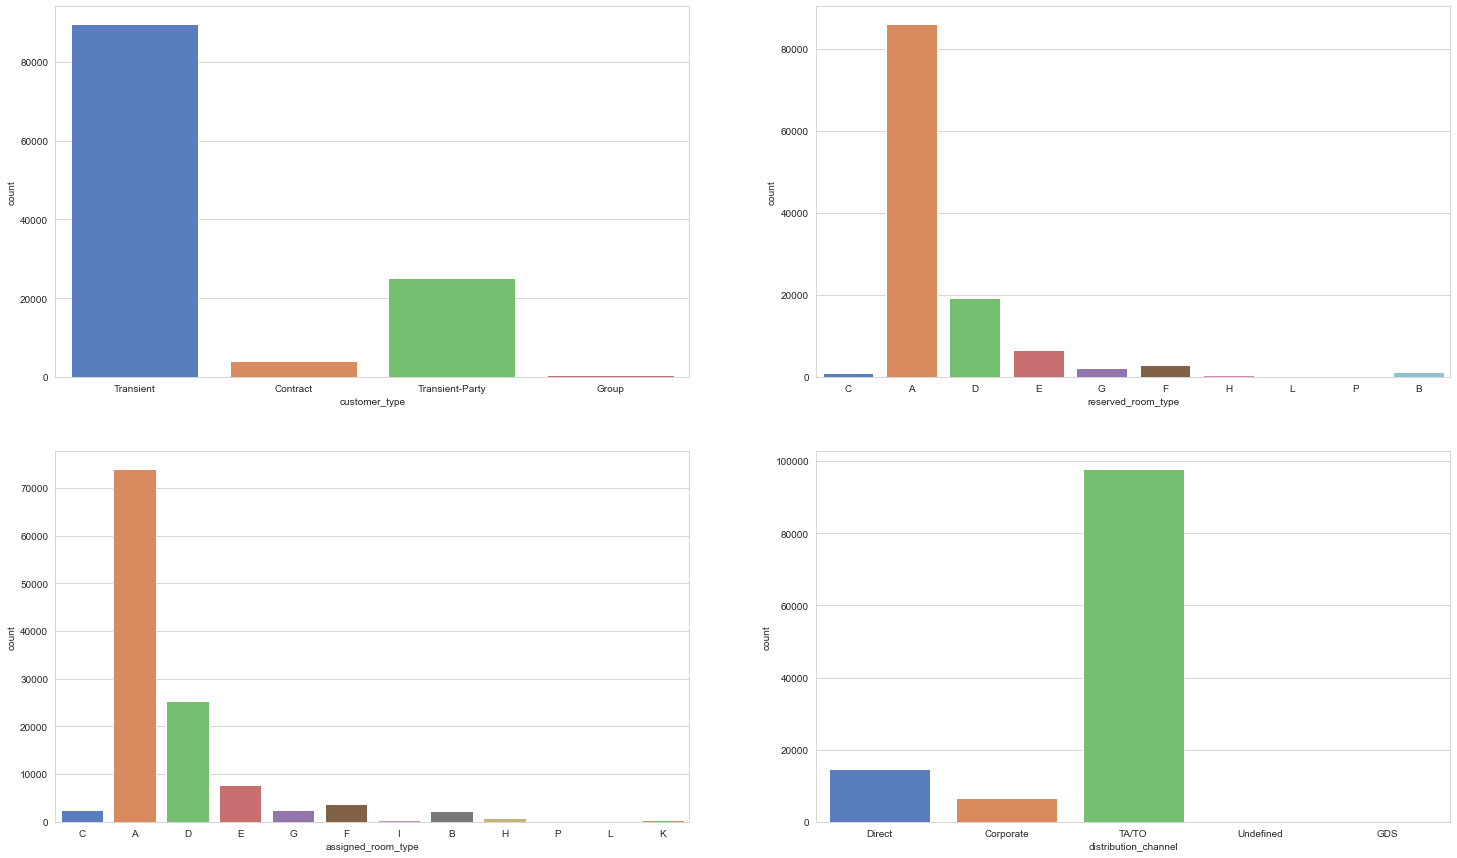

In [324]:
f,ax=plt.subplots(2,2,figsize=(25,15))
sns.countplot(x="customer_type",data=df,palette="muted",ax=ax[0][0])
sns.countplot(x="reserved_room_type",data=df,palette="muted",ax=ax[0][1])
sns.countplot(x="assigned_room_type",data=df,palette="muted",ax=ax[1][0])
sns.countplot(x="distribution_channel",data=df,palette="muted",ax=ax[1][1])

1.Required Car Parking Spaces

2.Total number of special requests

<AxesSubplot:xlabel='total_of_special_requests', ylabel='count'>

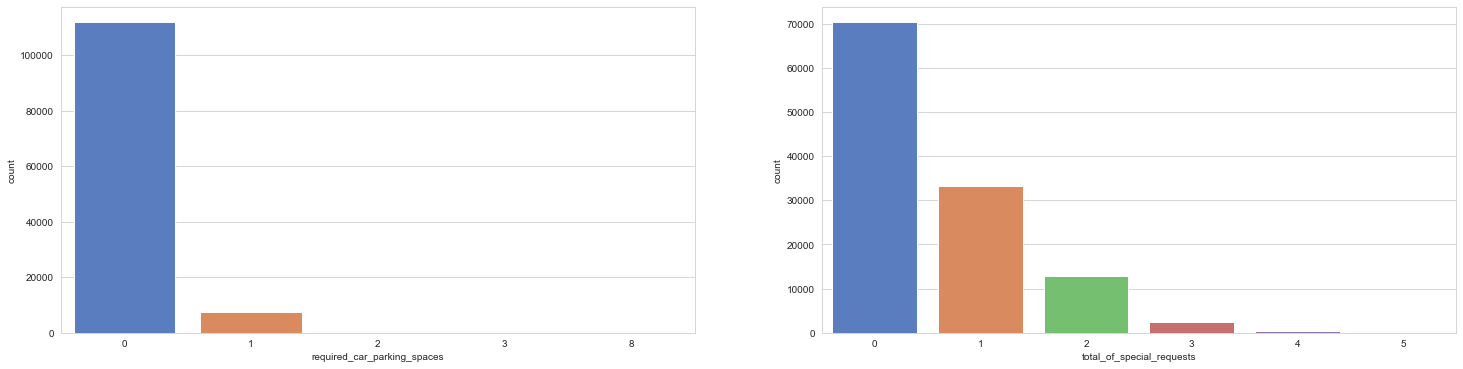

In [325]:
f,ax=plt.subplots(1,2,figsize=(25,6))
sns.countplot(x="required_car_parking_spaces",data=df,palette="muted",ax=ax[0])
sns.countplot(x="total_of_special_requests",data=df,palette="muted",ax=ax[1])

How much do guests pay for a room per night?

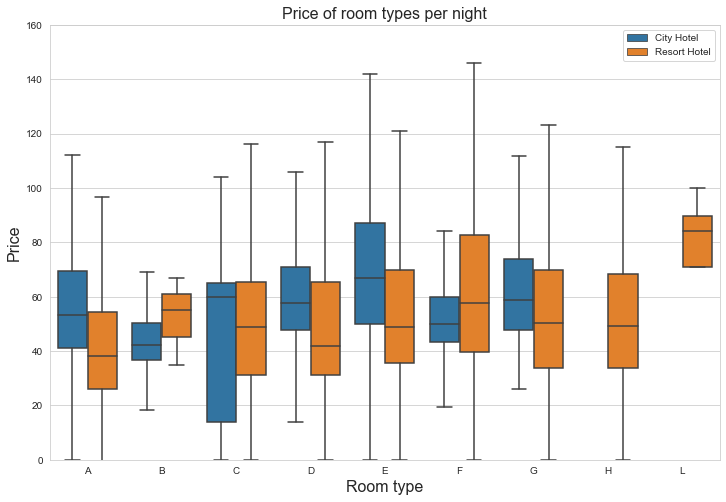

In [326]:
df = df.drop(df[df["is_canceled"]==1].index)
df["adr_pp"] = df["adr"] / (df["adults"] + df["children"])
room_prices = df[["hotel", "reserved_room_type", "adr_pp"]].sort_values("reserved_room_type")

plt.figure(figsize=(12, 8))
sns.boxplot(x="reserved_room_type",
            y="adr_pp",
            hue="hotel",
            data=room_prices, 
            hue_order=["City Hotel", "Resort Hotel"],
            fliersize=0)
plt.title("Price of room types per night", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 160)
plt.show()

How long do people stay at the hotels?

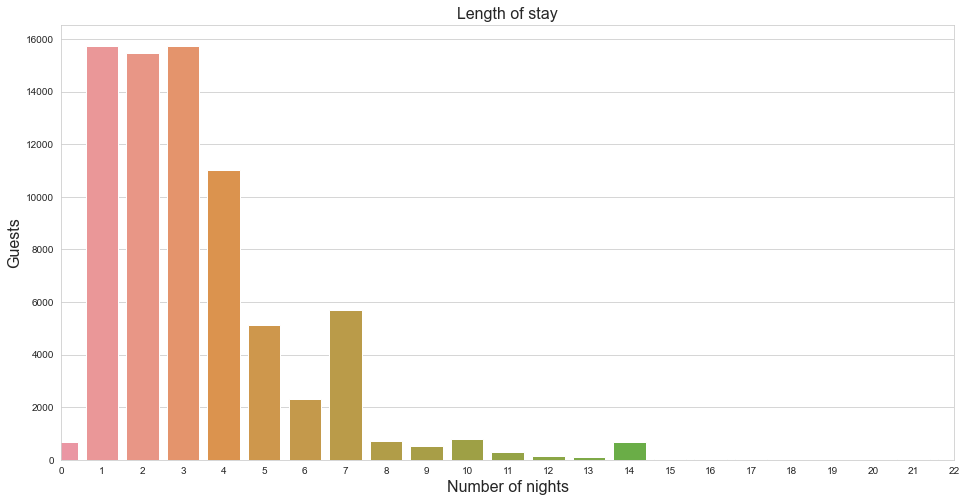

In [327]:
df["total_nights"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]
days = df["total_nights"].value_counts().index
guests_days = df["total_nights"].value_counts()

plt.figure(figsize=(16, 8))
sns.barplot(x = days, y = guests_days)
plt.title("Length of stay", fontsize=16)
plt.xlabel("Number of nights", fontsize=16)
plt.ylabel("Guests", fontsize=16)
plt.xlim(0,22)
plt.show()


Which are the most busy month?

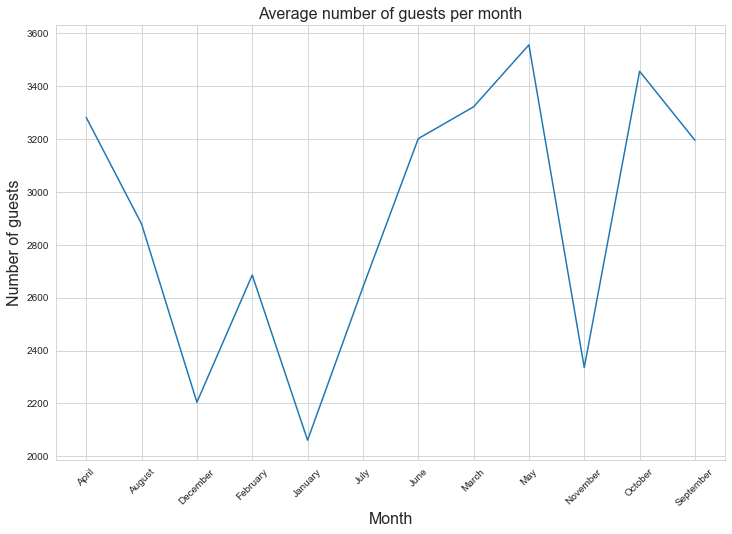

In [328]:
month = df.groupby("arrival_date_month")["hotel"].count().index
guests_monthly = df.groupby("arrival_date_month")["hotel"].count()
guests_monthly[["July","August"]] /= 3
guests_monthly[["January", "February", "March", "April", "May", "June", 
            "September", "October", "November", "December"]] /= 2

plt.figure(figsize=(12, 8))
sns.lineplot(x = month, y= guests_monthly ,sizes=(2.5, 2.5))
plt.title("Average number of guests per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Number of guests", fontsize=16)
plt.show()

#Which countries have highest percentage of customers.

In [329]:
# Only non cancelled bookings included 
guests_per_country = df[df.is_canceled == 0].groupby('country').hotel.count().sort_values(ascending = False)
guests_per_country = guests_per_country.reset_index()
guests_per_country.rename(columns = {'hotel' : 'bookings'}, inplace = True)

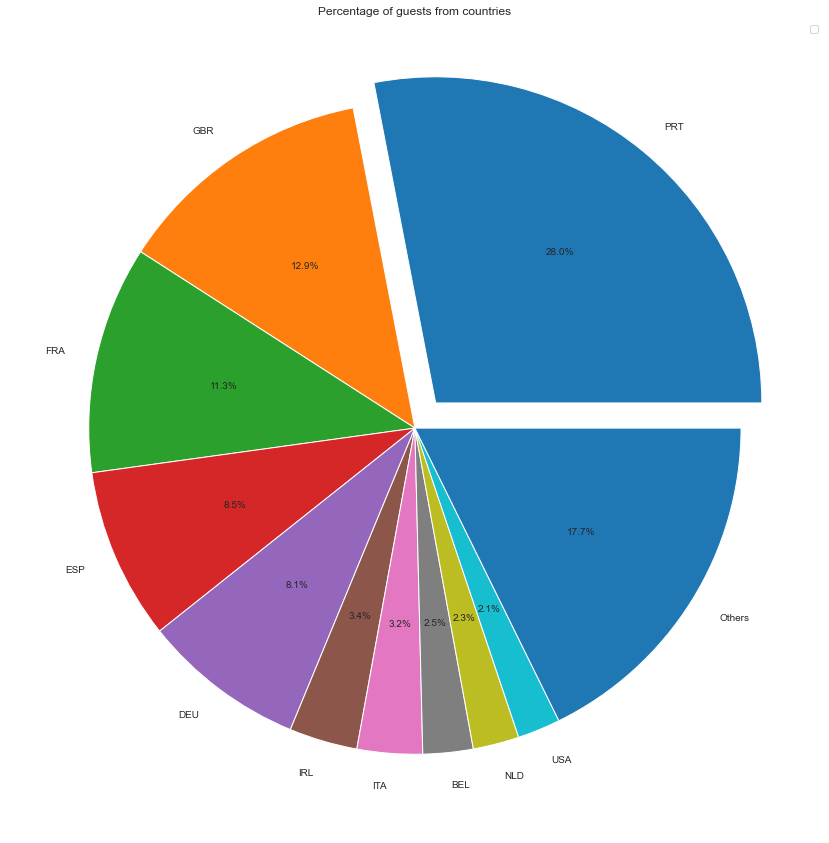

In [330]:
# The top 10 countries with highest number of bookings
guests_per_country_top_10 = guests_per_country[:10].copy()

# Others countries bookings combined
new_row = pd.DataFrame(data = { 'country' : ['Others'],
                                'bookings' : [guests_per_country['bookings'][10:].sum()]
                                })

guests_per_country = pd.concat([guests_per_country_top_10, new_row])


#Pie chart Plot
fig = plt.figure(figsize =(15, 15)) 
plt.title("Percentage of guests from countries")
plt.legend(guests_per_country.index, loc="best")
plt.pie(guests_per_country.bookings , autopct='%1.1f%%', labels=guests_per_country.country , explode =(0.1,0,0,0,0,0,0,0,0,0,0));

It is observed that highest number of booking are made by guests from Portugal. Also, Majority of bookings came through customers from Europe.

What percentage of total booking are cancelled.

In [331]:
print('{0:.2f}% of all bookings are cancelled.'.format(df.is_canceled.value_counts()[0]*100/df.is_canceled.count()))

100.00% of all bookings are cancelled.


For our time analysis we will convert 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month' into a single date column "arrival_date"

In [332]:
from datetime import *

df['arrival_date'] = df.apply(lambda x:datetime.strptime("{0} {1} {2}".format(x['arrival_date_year'],x['arrival_date_month'], x['arrival_date_day_of_month']), "%Y %B %d"),axis=1)
df[["arrival_date", "arrival_date_day_of_month","arrival_date_month","arrival_date_year"]].sample(5)

,arrival_date,arrival_date_day_of_month,arrival_date_month,arrival_date_year
107637,2017-03-12,12,March,2017
115316,2017-07-03,3,July,2017
27851,2016-09-11,11,September,2016
43601,2015-09-21,21,September,2015
117345,2017-08-02,2,August,2017


 Total number of bookings made per month.

      arrival_date  hotel month_year
11       July-2015   1517 2015-07-01
2      August-2015   2291 2015-08-01
24  September-2015   3020 2015-09-01
22    October-2015   3225 2015-10-01
20   November-2015   1854 2015-11-01


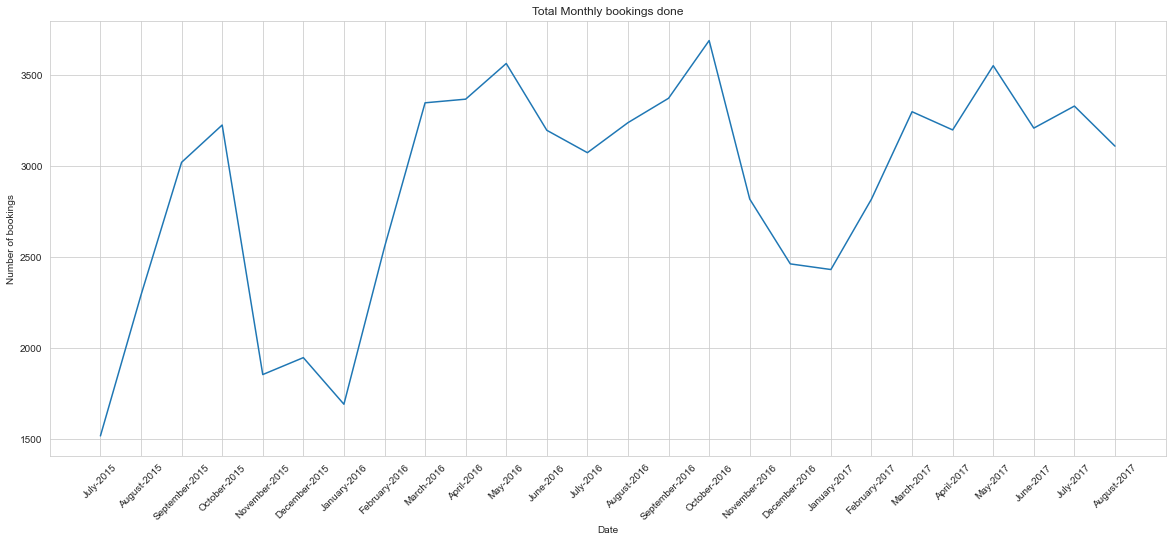

In [333]:
# Get total monthly bookings
bookings_per_month = df.groupby(df['arrival_date'].dt.strftime('%B-%Y')).count().hotel  # convert arrival date to month-year format to count total no of bookings in a month
bookings_per_month = bookings_per_month.reset_index()

bookings_per_month['month_year'] = pd.to_datetime(bookings_per_month.arrival_date, format='%B-%Y')  # Convert month-year to datetime and create new column to sort values
bookings_per_month = bookings_per_month.sort_values('month_year')  

print(bookings_per_month.head())


# Plot monthly bookings 

plt.figure(figsize=(20, 8))
plt.title("Total Monthly bookings done")
plt.xlabel("Date")
plt.ylabel("Number of bookings")
plt.plot(bookings_per_month.arrival_date , bookings_per_month.hotel);
plt.xticks(rotation=45);


Total number of bookings by each hotel

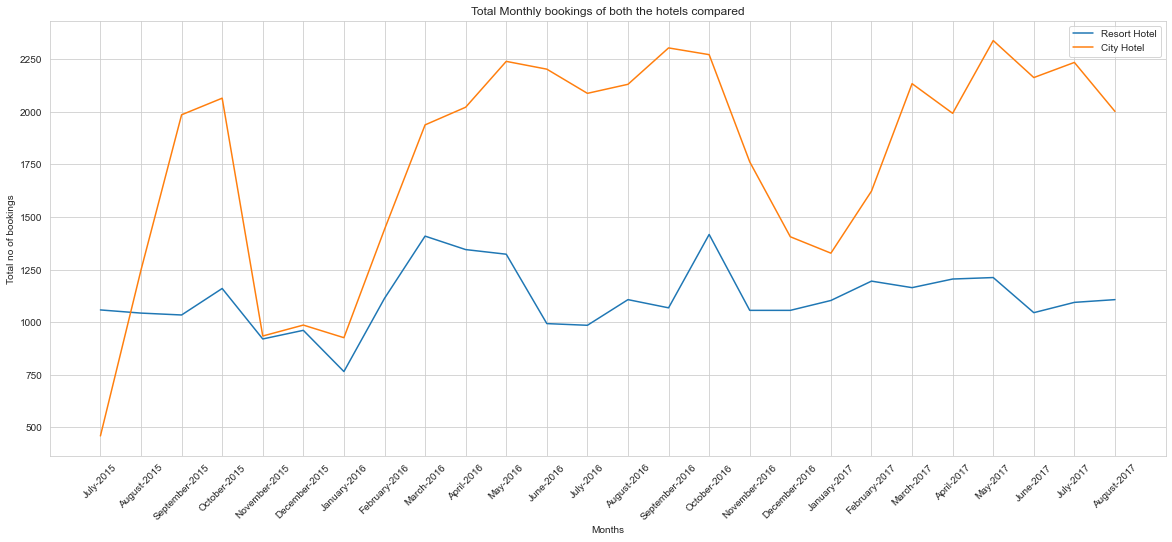

In [334]:
bookings_per_month = df.groupby(['hotel',  df['arrival_date'].dt.strftime('%B-%Y')]).count().lead_time
bookings_per_month = bookings_per_month.reset_index()
bookings_per_month.rename(columns = {'lead_time':'bookings'} , inplace = True)
bookings_per_month
bookings_per_month['month_year'] = pd.to_datetime(bookings_per_month.arrival_date, format='%B-%Y')  # Convert to datetime to sort values
bookings_per_month = bookings_per_month.sort_values('month_year')  
# print(bookings_per_month.head())

# bookings_per_month = bookings_per_month.unstack()
bookings_per_month_rh = bookings_per_month[bookings_per_month.hotel == 'Resort Hotel']
bookings_per_month_ch = bookings_per_month[bookings_per_month.hotel == 'City Hotel']


plt.figure(figsize=(20, 8))
plt.title("Total Monthly bookings of both the hotels compared")
plt.xlabel("Months")
plt.ylabel("Total no of bookings")
plt.plot(bookings_per_month_rh.arrival_date , bookings_per_month_rh.bookings);
plt.plot(bookings_per_month_ch.arrival_date , bookings_per_month_ch.bookings);
plt.legend(["Resort Hotel","City Hotel"])
plt.xticks(rotation=45);
                            



Bookings / Cancelled Bookings by different types of customers.

     customer_type  is_canceled  bookings
0         Contract            0      2814
1            Group            0       518
2        Transient            0     53099
3  Transient-Party            0     18735


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


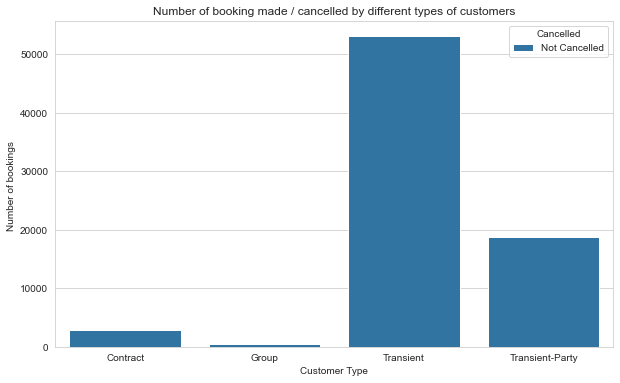

In [335]:
# Bookings done including cancelled bookings made by different types of customers.

# df.customer_type.unique()
customer_bookings = df.groupby(['customer_type','is_canceled']).count().hotel.reset_index()
customer_bookings.rename(columns = {'hotel':'bookings'} , inplace = True)
print(customer_bookings)

# Plotting The graph
plt.figure(figsize = (10,6))

ax = sns.barplot('customer_type', 'bookings', hue='is_canceled', data=customer_bookings );

plt.title("Number of booking made / cancelled by different types of customers")
plt.xlabel("Customer Type")
plt.ylabel("Number of bookings ")

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, ['Not Cancelled', 'Booking Cancelled'], title='Cancelled');


Hotel preference by Customer type.

     customer_type         hotel  bookings
0         Contract    City Hotel      1195
1         Contract  Resort Hotel      1619
2            Group    City Hotel       264
3            Group  Resort Hotel       254
4        Transient    City Hotel     32306
5        Transient  Resort Hotel     20793
6  Transient-Party    City Hotel     12463
7  Transient-Party  Resort Hotel      6272


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


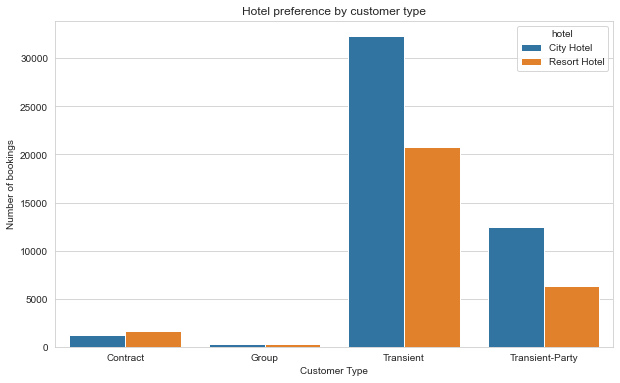

In [336]:
# Bookings done including cancelled bookings made by different types of customers.

# df.customer_type.unique()
customer_bookings = df.groupby(['customer_type','hotel']).count().lead_time.reset_index()
customer_bookings.rename(columns = {'lead_time':'bookings'} , inplace = True)
print(customer_bookings)

# Plotting The graph
plt.figure(figsize = (10,6))

sns.barplot('customer_type', 'bookings', hue='hotel', data=customer_bookings );

plt.title("Hotel preference by customer type")
plt.xlabel("Customer Type")
plt.ylabel("Number of bookings");

How many days in advance are most of the bookings made.

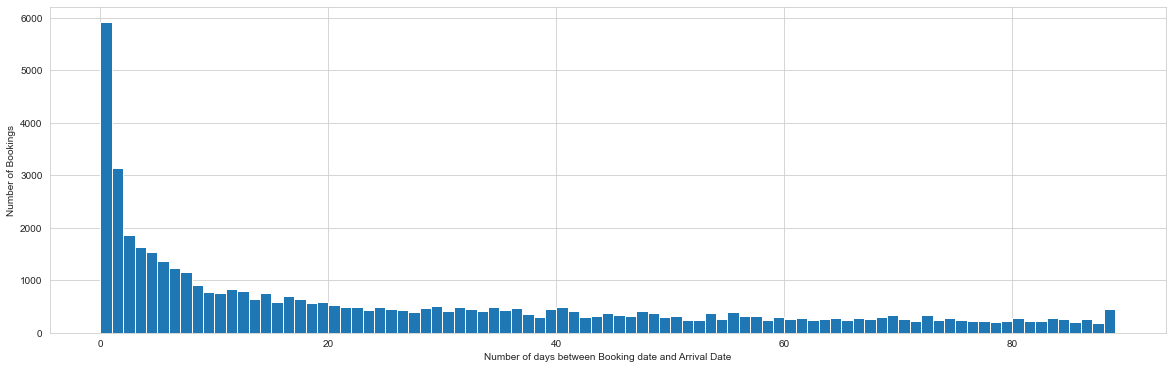

In [337]:
# df.lead_time
# Plot histogram for 90 days or 3 months of lead time

sns.set_style("whitegrid")
plt.figure(figsize = (20,6))
plt.hist(df.lead_time, bins=np.arange(0, 90, 1));


plt.xlabel("Number of days between Booking date and Arrival Date")
plt.ylabel("Number of Bookings");

Meal preference by customers

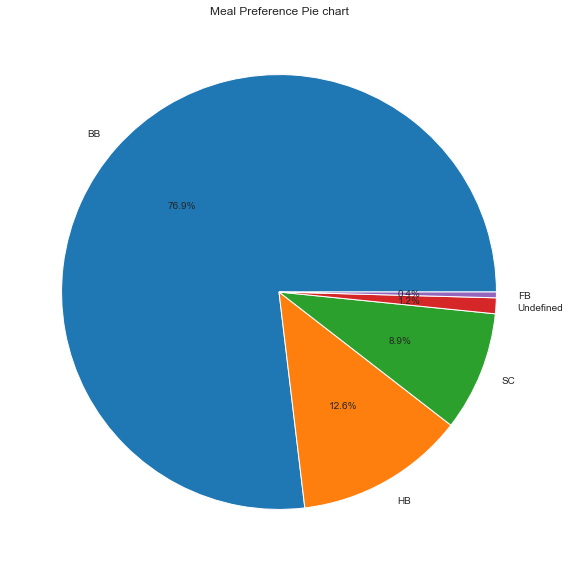

In [338]:
meal_preference = df.meal.value_counts()
meal_preference.index.name = "meal_type"
meal_preference = meal_preference.reset_index()
meal_preference

plt.figure(figsize = (15,10))
plt.pie(meal_preference.meal, autopct='%1.1f%%', labels=meal_preference.meal_type);

plt.title("Meal Preference Pie chart");

Deposit type prefered by Hotel for booking

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


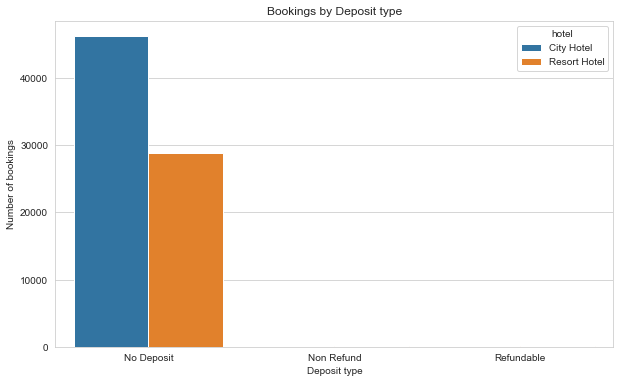

In [339]:
deposit_type_by_hotel  = df.groupby(["hotel","deposit_type"]).lead_time.count()
deposit_type_by_hotel = deposit_type_by_hotel.reset_index()
deposit_type_by_hotel.rename(columns = {"lead_time":"bookings"}, inplace = True)
deposit_type_by_hotel

plt.figure(figsize = (10,6))

sns.barplot('deposit_type', 'bookings', hue='hotel', data=deposit_type_by_hotel );
plt.title("Bookings by Deposit type")
plt.xlabel("Deposit type")
plt.ylabel("Number of bookings");

In [340]:
print('{0:.2f}% of all bookings are cancelled at City Hotel.'.format(df[df.hotel == "City Hotel"].is_canceled.sum() * 100 / df[df.hotel == "City Hotel"].is_canceled.count()))
print('{0:.2f}% of all bookings are cancelled at Resort Hotel.'.format(df[df.hotel == "Resort Hotel"].is_canceled.sum() * 100 / df[df.hotel == "Resort Hotel"].is_canceled.count()))

0.00% of all bookings are cancelled at City Hotel.
0.00% of all bookings are cancelled at Resort Hotel.


The bar chart above indicates that City Hotel offered most of its bookings without any initial deposit which maybe the reason for high booking cancellation percentage in comparision to Resort Hotel.

lead_time

So here we see that this column is highly right-skewed. Most people only book the hotel a few days before they go, but there is people who book two years prior to their check in!

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


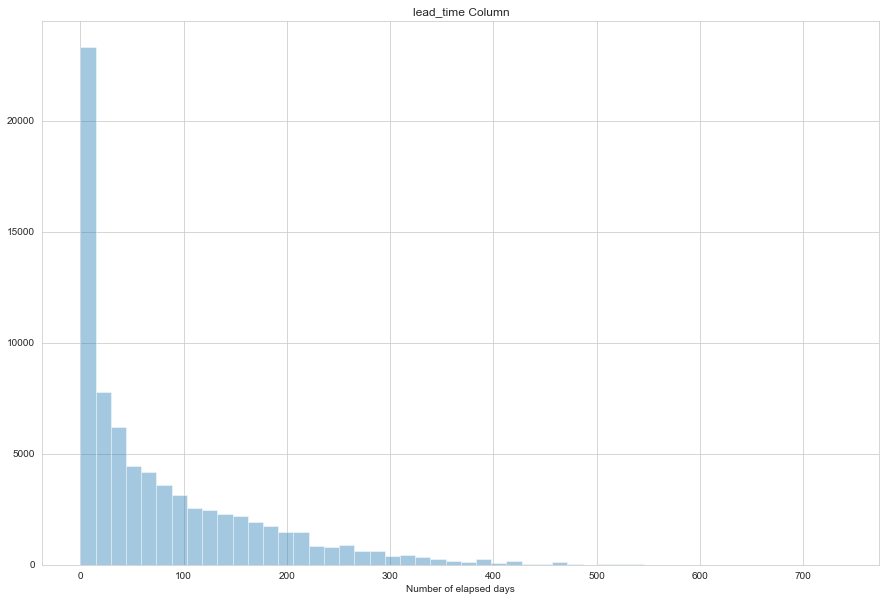

In [341]:
plt.figure(figsize=(15, 10))
plt.title("lead_time Column")
sns.distplot(a=df['lead_time'], kde=False, axlabel="Number of elapsed days")
plt.show()


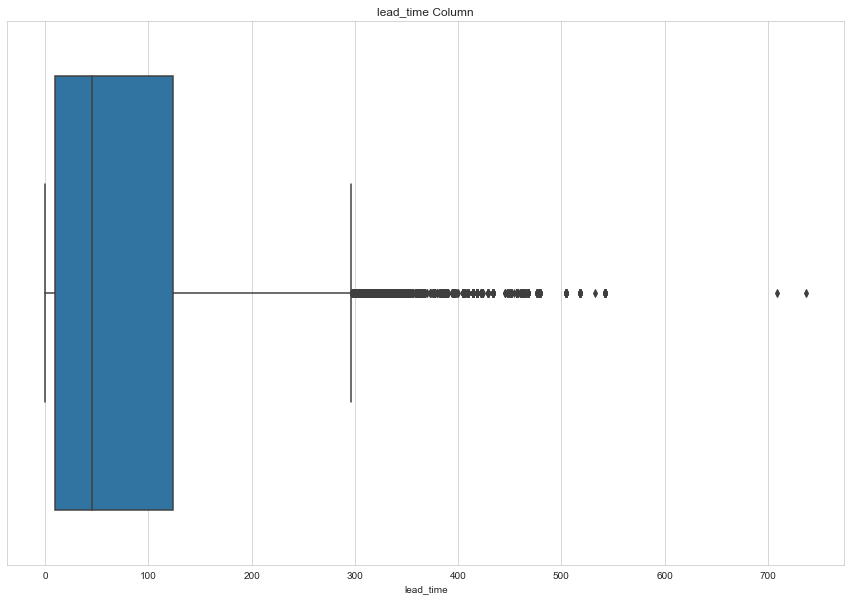

count    75166.000000
mean        79.984687
std         91.109888
min          0.000000
25%          9.000000
50%         45.000000
75%        124.000000
max        737.000000
Name: lead_time, dtype: float64


In [342]:
plt.figure(figsize=(15, 10))
plt.title("lead_time Column")
sns.boxplot(x=df['lead_time'])
plt.show()

print(df['lead_time'].describe())

Arrival Month

So from this column, we see that there is a slighly increase in arrivings during summer, which is also intuitive because most families can travel together during summer because kids are in vocation.



In [343]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'code', 'code_le',
       'adr_pp', 'total_nights', 'arrival_date'],
      dtype='object')

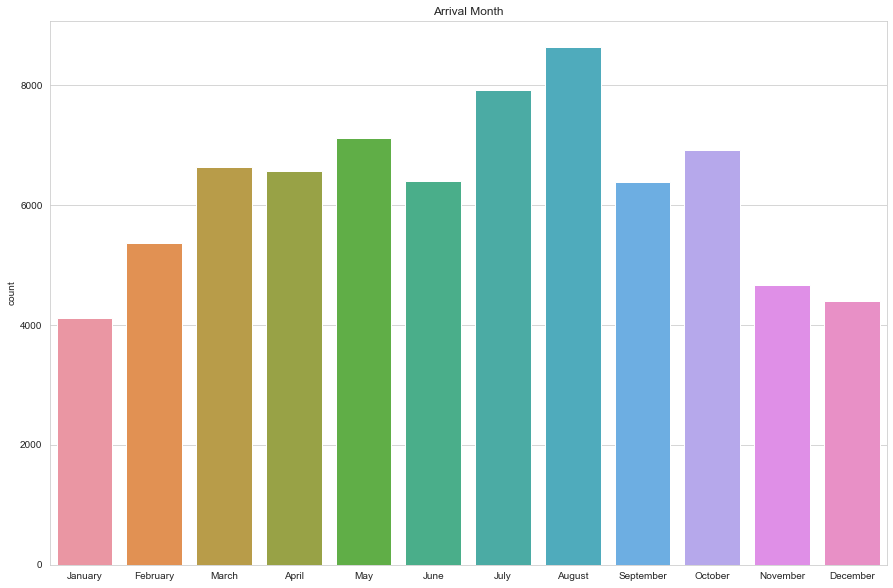

Percentages: 
January       5.483862
February      7.146848
March         8.840433
April         8.734002
May           9.464385
June          8.519809
July         10.535348
August       11.491898
September     8.503845
October       9.198308
November      6.215576
December      5.865684
dtype: float64


In [344]:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

sorted_month = pd.Categorical(df["arrival_date_month"], categories=ordered_months, ordered=True)

plt.figure(figsize=(15, 10))
plt.title("Arrival Month")
sns.countplot(x=sorted_month)
plt.show()

print("Percentages: ")
print(sorted_month.value_counts() / df.shape[0] * 100)

stays_in_weekend_nights

So most people actually don't stay overnight during weekends, but there are people who basically lived in the hotel for a few weeks.

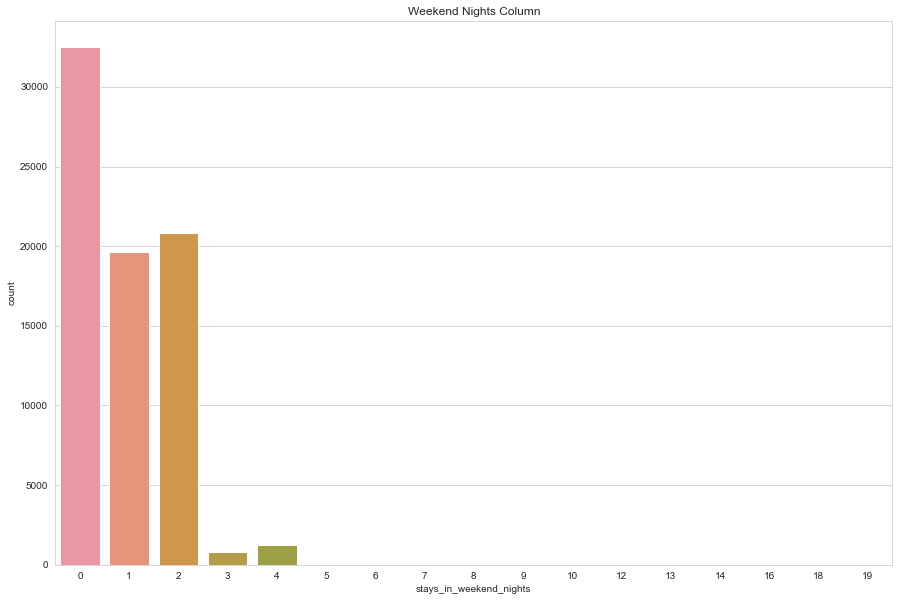

Percentages: 
0     43.233643
2     27.702685
1     26.100897
4      1.672299
3      1.084267
6      0.087806
5      0.047894
8      0.034590
7      0.006652
10     0.006652
9      0.005322
12     0.005322
13     0.003991
14     0.002661
16     0.002661
18     0.001330
19     0.001330
Name: stays_in_weekend_nights, dtype: float64


In [345]:
plt.figure(figsize=(15, 10))
plt.title("Weekend Nights Column")
sns.countplot(x=df['stays_in_weekend_nights'])
plt.show()

print("Percentages: ")
print(df['stays_in_weekend_nights'].value_counts() / df.shape[0] * 100)


How does the price per night vary over the year?

To keep it simple, I'm using the average price per night and person, regardless of the room type and meal.

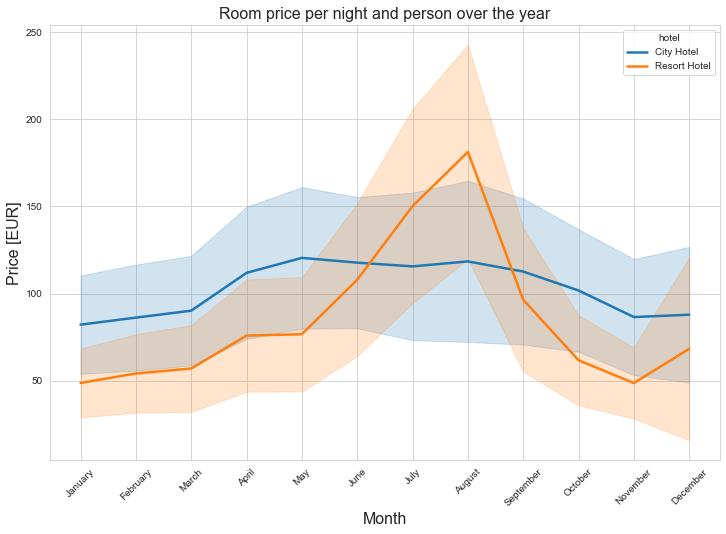

In [346]:
# grab data:
room_prices_mothly = df[["hotel", "arrival_date_month", "adr"]].sort_values("arrival_date_month")

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
room_prices_mothly["arrival_date_month"] = pd.Categorical(room_prices_mothly["arrival_date_month"], categories=ordered_months, ordered=True)

# barplot with standard deviation:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr", hue="hotel", data=room_prices_mothly, 
            hue_order = ["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2.5, 2.5))
plt.title("Room price per night and person over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Price [EUR]", fontsize=16)
plt.show()

Which month have the highest number of cancelations?

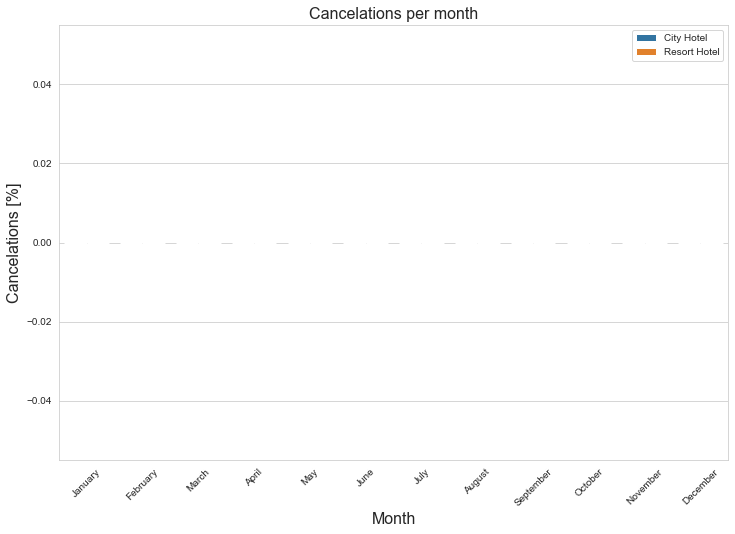

In [348]:
# Create a DateFrame with the relevant data:
res_book_per_month = df.loc[(df["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
res_cancel_per_month = df.loc[(df["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

cty_book_per_month = df.loc[(df["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
cty_cancel_per_month = df.loc[(df["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

res_cancel_data = pd.DataFrame({"Hotel": "Resort Hotel",
                                "Month": list(res_book_per_month.index),
                                "Bookings": list(res_book_per_month.values),
                                "Cancelations": list(res_cancel_per_month.values)})
cty_cancel_data = pd.DataFrame({"Hotel": "City Hotel",
                                "Month": list(cty_book_per_month.index),
                                "Bookings": list(cty_book_per_month.values),
                                "Cancelations": list(cty_cancel_per_month.values)})

df= pd.concat([res_cancel_data, cty_cancel_data], ignore_index=True)
df["cancel_percent"] = df["Cancelations"] / df["Bookings"] * 100

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
df["Month"] = pd.Categorical(df["Month"], categories=ordered_months, ordered=True)

# show figure:
plt.figure(figsize=(12, 8))
sns.barplot(x = "Month", y = "cancel_percent" , hue="Hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=df)
plt.title("Cancelations per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.legend(loc="upper right")
plt.show()

In [349]:
from sklearn.model_selection import train_test_split

In [437]:
x=df_New[['arrival_date_year']]


In [470]:
y=df_New[['is_canceled','previous_cancellations']]

In [471]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2, random_state=9)

In [472]:
from sklearn.tree import DecisionTreeClassifier

In [473]:
dct=DecisionTreeClassifier(random_state=9)

In [474]:
dct.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=9)

In [475]:
Y_prediction=dct.predict(X_test)

In [476]:
from sklearn.metrics import accuracy_score

In [477]:
accuracy_score(Y_test,Y_prediction)

ValueError: Classification metrics can't handle a mix of multiclass-multioutput and multilabel-indicator targets

In [478]:
#prediction using RandomForest
from sklearn.ensemble import RandomForestClassifier

In [479]:
rf= RandomForestClassifier(n_estimators=500)

In [480]:
rf.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=500)

In [481]:
Y_prediction=rf.predict(X_test)

In [482]:
accuracy_score(Y_test,Y_prediction)

ValueError: Classification metrics can't handle a mix of multiclass-multioutput and multilabel-indicator targets

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logr=LogisticRegression(max_iter=1000,random_state=9)

In [ ]:
logr.fit(X_train,Y_train)

In [ ]:
Y_prediction=logr.predict(X_test)

In [ ]:
print(accuracy_score(Y_prediction,Y_test))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=df_New[['arrival_date_year']]


In [ ]:
y=df_New[['is_canceled','previous_cancellations']]

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
len(X_train)

In [ ]:
len(X_test)

In [ ]:
X_train

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model=RandomForestClassifier(n_estimators=20)

In [ ]:
model.fit(X_train,Y_train)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))
print(accuracy_score(Y_test,y_pred))

In [484]:
from sklearn.model_selection import train_test_split

x=df_New[['arrival_date_year','previous_cancellations']]
y=df_New['is_canceled']
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2)

In [485]:
len(X_train)

69916

In [486]:
len(X_test)

17480

In [487]:
X_train

,arrival_date_year,previous_cancellations
110799,2017,0
43549,2015,0
22775,2016,0
117818,2017,0
72732,2017,0
...,...,...
102836,2016,0
82277,2015,0
109792,2017,0
14168,2016,0


In [489]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=50)

In [490]:
df_New['is_canceled']

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 87396, dtype: int64